In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
otherChars = pd.read_csv("Other Characters - Sheet1.csv")
otherChars.head()

,character name,age,height(cm),eyeColor,hairColor,specialPowers,country/placeOfResidence,gender,species,movie,releaseDate
0,Aang,112,137.0,grey,bald,1,Avatar,Male,Airbender,Avatar The Last Airbender,2005
1,Katara,14,144.5,blue,brown,1,Avatar,Female,Waterbender,Avatar The Last Airbender,2005
2,Sokka,15,150.0,blue,brown,1,Avatar,Male,Waterbender,Avatar The Last Airbender,2005
3,Toph,12,130.0,green,dark brown,1,Avatar,Female,Earthbender,Avatar The Last Airbender,2005
4,Tanjiro,15,165.0,red,dark brown,1,Japan,Male,Human,Demon Slayer,2021


In [2]:
# clean dataframe and drop non-beneficial 
cleanedCharacters = otherChars.drop(columns = ['character name','movie', 'releaseDate', 'country/placeOfResidence'], axis=1)
cleanedCharacters.head(20)

,age,height(cm),eyeColor,hairColor,specialPowers,gender,species
0,112,137.0,grey,bald,1,Male,Airbender
1,14,144.5,blue,brown,1,Female,Waterbender
2,15,150.0,blue,brown,1,Male,Waterbender
3,12,130.0,green,dark brown,1,Female,Earthbender
4,15,165.0,red,dark brown,1,Male,Human
5,12,152.0,pink,dark brown,1,Female,Demon
6,16,164.5,brown,yellow,1,Male,Human
7,15,165.0,green,blue black,1,Male,Human
8,1000,179.0,red,black,1,Male,Demon
9,480,190.0,yellow,reddish brown,1,Male,Demon


In [3]:
# Scale price data, return, and variance values
data_scaled = StandardScaler().fit_transform(
    cleanedCharacters[["age","height(cm)"]]
)

In [4]:
# Create a DataFrame with the scaled data
df_data_scaled = pd.DataFrame(
    data_scaled,
    columns=[["age","height(cm)"]]
)

# Display sample data
df_data_scaled.head()

,age,height(cm)
0,-0.027175,-1.441128
1,-0.400513,-1.032748
2,-0.396704,-0.733269
3,-0.408133,-1.822283
4,-0.396704,0.083491


In [5]:
# get_dummies to convert categorical values to numerical values
cat_dum = cleanedCharacters.copy()
cat_dum.drop(columns=["age","species","height(cm)"], axis=1, inplace=True)
cat_dum2 = pd.concat([cat_dum, df_data_scaled], axis=1)
ghibli_dummies = pd.get_dummies(cat_dum2)
ghibli_dummies.head()

,specialPowers,"(age,)","(height(cm),)",eyeColor_black,eyeColor_blue,eyeColor_brown,eyeColor_green,eyeColor_grey,eyeColor_pink,eyeColor_red,...,hairColor_black,hairColor_blonde,hairColor_blue black,hairColor_brown,hairColor_dark brown,hairColor_reddish brown,hairColor_white,hairColor_yellow,gender_Female,gender_Male
0,1,-0.027175,-1.441128,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,-0.400513,-1.032748,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,1,-0.396704,-0.733269,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,1,-0.408133,-1.822283,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,1,-0.396704,0.083491,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [6]:
# Look at Species value counts for binning
species_class = otherChars['species']
species_class.head()

0      Airbender
1    Waterbender
2    Waterbender
3    Earthbender
4          Human
Name: species, dtype: object

In [7]:
# Create All Human species classifications to be replaced with 1
Humans = species_class[species_class == "Human"]

# Replace in dataframe
for species in Humans:
    otherChars['species'] =otherChars['species'].replace(species,"1")

# Check to make sure binning was successful
otherChars['species']

0       Airbender
1     Waterbender
2     Waterbender
3     Earthbender
4               1
5           Demon
6               1
7               1
8           Demon
9           Demon
10              1
11              1
12              1
13              1
14              1
Name: species, dtype: object

In [8]:
# Create All Human species classifications to be replaced with 1
OtherSpecies = species_class[species_class != "Human"]

# Replace in dataframe
for species in OtherSpecies:
    otherChars['species'] = otherChars['species'].replace(species,"0")

# Check to make sure binning was successful
otherChars['species']

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     0
9     0
10    1
11    1
12    1
13    1
14    1
Name: species, dtype: object

In [9]:
# split data into features and target arrays
y = otherChars['species'].astype('float64')
X = ghibli_dummies.values

In [10]:
# show first 3 X values
X[:3]

array([[1, -0.027174971480466617, -1.441127887642552, False, False,
        False, False, True, False, False, False, True, False, False,
        False, False, False, False, False, False, False, True],
       [1, -0.4005133647167834, -1.0327478187262118, False, True, False,
        False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, True, False],
       [1, -0.39670378927559646, -0.7332691015208955, False, True, False,
        False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, True]], dtype=object)

In [11]:
# show 10 y values
y[:20]

0     0.0
1     0.0
2     0.0
3     0.0
4     1.0
5     0.0
6     1.0
7     1.0
8     0.0
9     0.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
Name: species, dtype: float64

In [12]:
# split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (11, 22)
Training Data Labels Shape: (11,)


In [13]:
# Create Standard Scaler
scaler = StandardScaler()

# Fit scaler to training data
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation='relu', input_dim=22))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 115       
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                220       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 416 (1.62 KB)
Trainable params: 416 (1.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/150
1/1 [==============================] - 1s 615ms/step - loss: 0.7193 - accuracy: 0.3636
Epoch 2/150
1/1 [==============================] - 0s 8ms/step - loss: 0.7130 - accuracy: 0.3636
Epoch 3/150
1/1 [==============================] - 0s 5ms/step - loss: 0.7068 - accuracy: 0.2727
Epoch 4/150
1/1 [==============================] - 0s 6ms/step - loss: 0.7007 - accuracy: 0.2727
Epoch 5/150
1/1 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.2727
Epoch 6/150
1/1 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.2727
Epoch 7/150
1/1 [==============================] - 0s 6ms/step - loss: 0.6832 - accuracy: 0.2727
Epoch 8/150
1/1 [==============================] - 0s 6ms/step - loss: 0.6776 - accuracy: 0.2727
Epoch 9/150
1/1 [==============================] - 0s 6ms/step - loss: 0.6722 - accuracy: 0.4545
Epoch 10/150
1/1 [==============================] - 0s 5ms/step - loss: 0.6669 - accuracy: 0.4545
Epoch 11/150
1/1 [=========

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.5500 - accuracy: 0.5000 - 156ms/epoch - 156ms/step
Loss: 0.550041913986206, Accuracy: 0.5


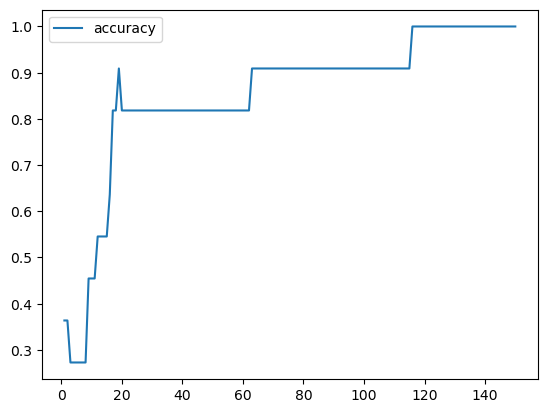

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()